<a href="https://colab.research.google.com/github/khushalcyber/Covid-19-Data-analysis/blob/master/final_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing** **The** **Necessary** **Libraries**


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = "/content/drive/MyDrive/dataset_v2/train/"
test_path = "/content/drive/MyDrive/dataset_v2/test/"

In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
# useful for getting number of classes
folders = glob("/content/drive/MyDrive/dataset_v2/train/*")
print(len(folders))
print(folders)

2
['/content/drive/MyDrive/dataset_v2/train/def', '/content/drive/MyDrive/dataset_v2/train/ok']


In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)


In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/dataset_v2/train/",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 16386 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory( "/content/drive/MyDrive/dataset_v2/test/",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 3339 images belonging to 2 classes.


In [ ]:
print(len(training_set))
print(len(test_set))

513
105


**Training with 5 Epochs**

In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
271/513 [==============>...............] - ETA: 20:01 - loss: 0.2993 - accuracy: 0.8778

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


513/513 [==============================] - 3567s 7s/step - loss: 0.2299 - accuracy: 0.9093 - val_loss: 0.1511 - val_accuracy: 0.9413
Epoch 2/5
513/513 [==============================] - 268s 523ms/step - loss: 0.1063 - accuracy: 0.9630 - val_loss: 0.0885 - val_accuracy: 0.9662
Epoch 3/5
513/513 [==============================] - 266s 519ms/step - loss: 0.0808 - accuracy: 0.9722 - val_loss: 0.0595 - val_accuracy: 0.9799
Epoch 4/5
513/513 [==============================] - 267s 520ms/step - loss: 0.0884 - accuracy: 0.9675 - val_loss: 0.0571 - val_accuracy: 0.9799
Epoch 5/5
513/513 [==============================] - 265s 516ms/step - loss: 0.0650 - accuracy: 0.9785 - val_loss: 0.0443 - val_accuracy: 0.9850


**MODEL** **EVALUATION**

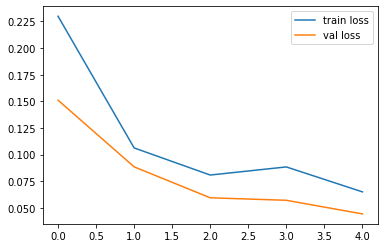

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

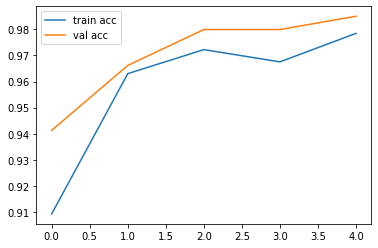

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

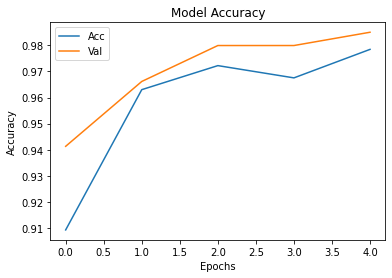

In [ ]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'upper left')

In [ ]:
model.evaluate(test_set, steps=test_set.samples/test_set.batch_size)

104/104 [==============================] - 29s 279ms/step - loss: 0.0443 - accuracy: 0.9850


[0.04433760419487953, 0.9850254654884338]

In [ ]:
import tensorflow as tf

from keras.models import load_model

In [ ]:
model.save('finalmodel3.h5')

**TESTING ON DIFFERENT IMAGES**

In [ ]:
from PIL import Image


In [ ]:
import os
import cv2
from PIL import Image
import tensorflow as tf
from keras import backend as K
from keras.preprocessing import image as image_utils

from keras.models import Sequential
from keras.preprocessing import image as image_utils
import pandas as pd

from keras.models import load_model
from keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras.models import load_model

from keras.preprocessing.image import load_img,img_to_array
from keras.preprocessing import image


model1 = load_model('/content/finalmodel3.h5',compile=False)  

In [ ]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}
print(lab)


{0: 'def', 1: 'ok'}


In [ ]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

'ok'

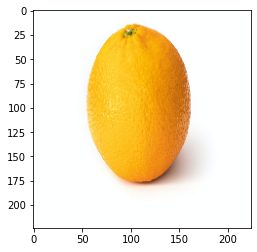

In [ ]:
img="/content/sample_test1.jfif"
pic= load_img("/content/sample_test1.jfif",target_size=(224,224,3))
plt.imshow(pic)
output(img)

ok = The Given Image Has **No Anomaly**

'def'

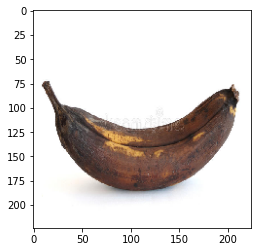

In [ ]:
img="/content/sample_test2.jpg"
pic= load_img("/content/sample_test2.jpg",target_size=(224,224,3))
plt.imshow(pic)
output(img)

def = The Given Image Has **Anomaly**